In [12]:
!git clone https://github.com/lucas-noblat/GerOndApp.git

import sys

sys.path.append('/content/GerOndApp/APP')


#import functions as fc


fatal: destination path 'GerOndApp' already exists and is not an empty directory.


In [ ]:
#sig = fc.gerar_sinal('a', 1, 3, 1, 0)

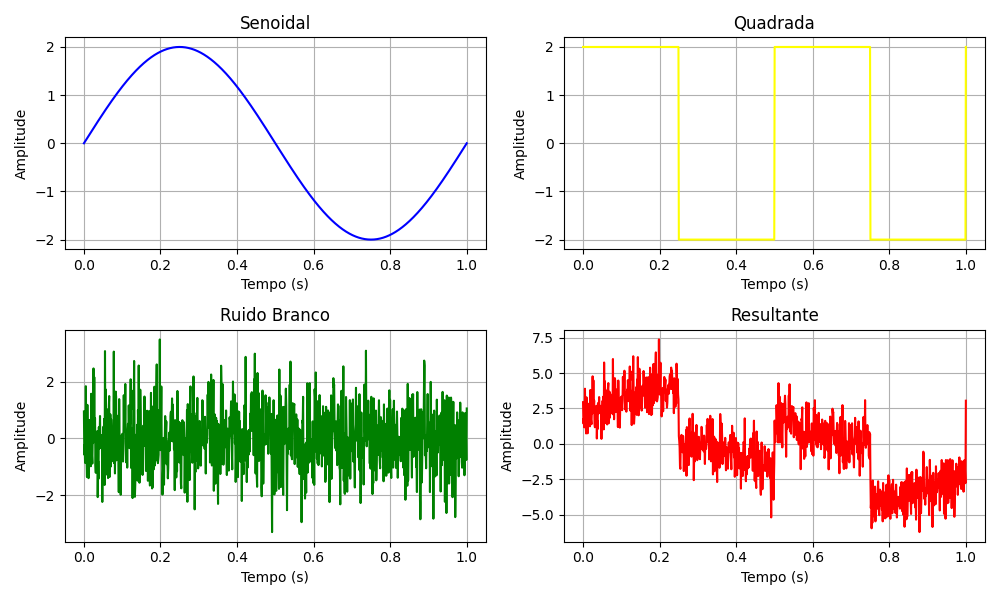

In [ ]:
# Define o vetor tempo que será usado
vetor_tempo = fc.np.linspace(0,1,1000)

seno = fc.onda_senoidal(amplitude = 2, frequencia = 1, t = vetor_tempo, fase = 0)
quad = fc.onda_quadrada(amplitude = 2, frequencia = 2, t = vetor_tempo, duty = 0.5)
ruidoBranco = fc.ruido_branco(1, 1, 1000)

lista_operacoes = ['+', '+']
series_ativas = [seno, quad, ruidoBranco]
res = fc.aplicar_operacoes(series_ativas, lista_operacoes)
fc.plotar_2x2(seno, quad, ruidoBranco, res,vetor_tempo,
             labels = ['Senoidal','Quadrada','Ruido Branco','Resultante'])

In [ ]:
series_ativas = [seno, quad, ruidoBranco]
operacoes = ['+','+']

resultante = fc.aplicar_operacoes(series_ativas, operacoes)
fc.plotar(resultante, t, 'Série Resultante')
fc.plotar(seno, t, "Seno")

<class 'NameError'>: name 't' is not defined